<!DOCTYPE html>    
<html> 
    <head>
        <title> <h2 style="color:blue;font-size:32px;">Le modèle: Optimisation de la production de téléphones</h2> </title>
    </head>
    <body><h2 style="color:blue;font-size:20px;">Les variables : </h2>
        <ul>
             <li>Nombre de téléphones de Bureau produit</li>
                <li>Nombre de téléphone mobile produit</li>
        </ul>
        <h2 style="color:blue;font-size:20px;">L'objectif: </h2>
        <ul>
            <li>Maximiser le profit</li>
         </ul>
         <body><h2 style="color:blue;font-size:20px;">Les contraintes : </h2>
        <ol>
            <li>La production de téléphones fixes doit être >= 100</li>
            <li>La production de téléphones mobiles doit être >= 100</li>
            <li>L'assemblage des deux lignes doit être inférieur à 400 heures </li>
            <li>L'assemblage des deux lignes doit être inférieur 490 heures </li> 
        </ol>
    </body>

In [ ]:
"""

https://ibmdecisionoptimization.github.io/tutorials/html/Linear_Programming.html

"""

In [34]:
"""
on installe la librairie si pas déjà fait
"""
#!pip install docplex 


ERROR: Could not find a version that satisfies the requirement cplex
ERROR: No matching distribution found for cplex


In [18]:
import sys
import docplex.mp

from docplex.mp.model import Model # On importe la Classe Model

m = Model(name='telephone_production') # On crée un objet de la Classe Model

<h3><br> On définit les éléments du modèle :<h3>

In [19]:
"""
Définition des variables
"""

desk = m.continuous_var(name='desk') # la production des téléphones fixes
cell = m.continuous_var(name='cell') # la production des téléphones mobiles

"""
Définition des contraintes de production : on va chercher la méthode "add_constraint de la classe Model"
"""
m.add_constraint(desk >= 100) # la variable "desk" doit être >= 100
m.add_constraint(cell >= 100) # la variable "cell" doit être >= 100
ct_assembly = m.add_constraint( 0.2 * desk + 0.4 * cell <= 400) # contrainte de temps de production selon le modèle
ct_painting = m.add_constraint( 0.5 * desk + 0.4 * cell <= 490) # contrainte de temps de peinture selon le modèle

"""
Définition de l'objectif (methode maximize de la classe Model)
"""
m.maximize(12 * desk + 20 * cell) # le bénéfice du fixe est 12 € et celui du mobile est de 20€ 

<h2> Représentation graphique<h2>

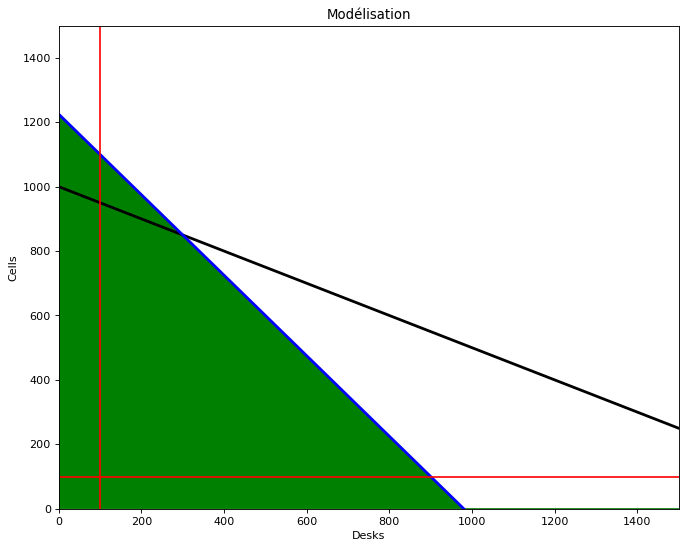

In [31]:
import matplotlib.pyplot as plt 
import numpy as np
import math
from pylab import *
"""
0.2*x+0.4*y<=400
y<=(4-0.2*x)/0.4

0.5*x+0.4*y<=490
y<=(490-0.5*x)/0.4

"""

figure(figsize=(10,8), dpi=80)
x = np.linspace(0, 1500, 10000) # (début,fin, nbre entre les 2)
y1=(400-0.2*x)/0.4
y2=(490-0.5*x)/0.4

plot(x, y1, color="black", linewidth=2.5, linestyle="-")
plot(x, y2, color="blue", linewidth=2.5, linestyle="-")
y3=plt.axvline(100,color="red")
y4=plt.axhline(100,color="red")
plt.fill_between(x,y2, color = 'green')

xlim(0,1500)
ylim(0,1500)

plt.title("Modélisation") 
plt.xlabel("Desks") 
plt.ylabel("Cells")
plt.show() 


<h2> On lance le calcul d'optimisation<h2>

In [ ]:

s = m.solve() # On utilise la méthode solve
m.print_solution()

<h2> Afin d'utiliser la méthode solve() :
on importe le script dans Cloud Pak For Data<h2>

<h3>Il faut ouvrir un compte et choisir un environnement Decision Optimization<h3

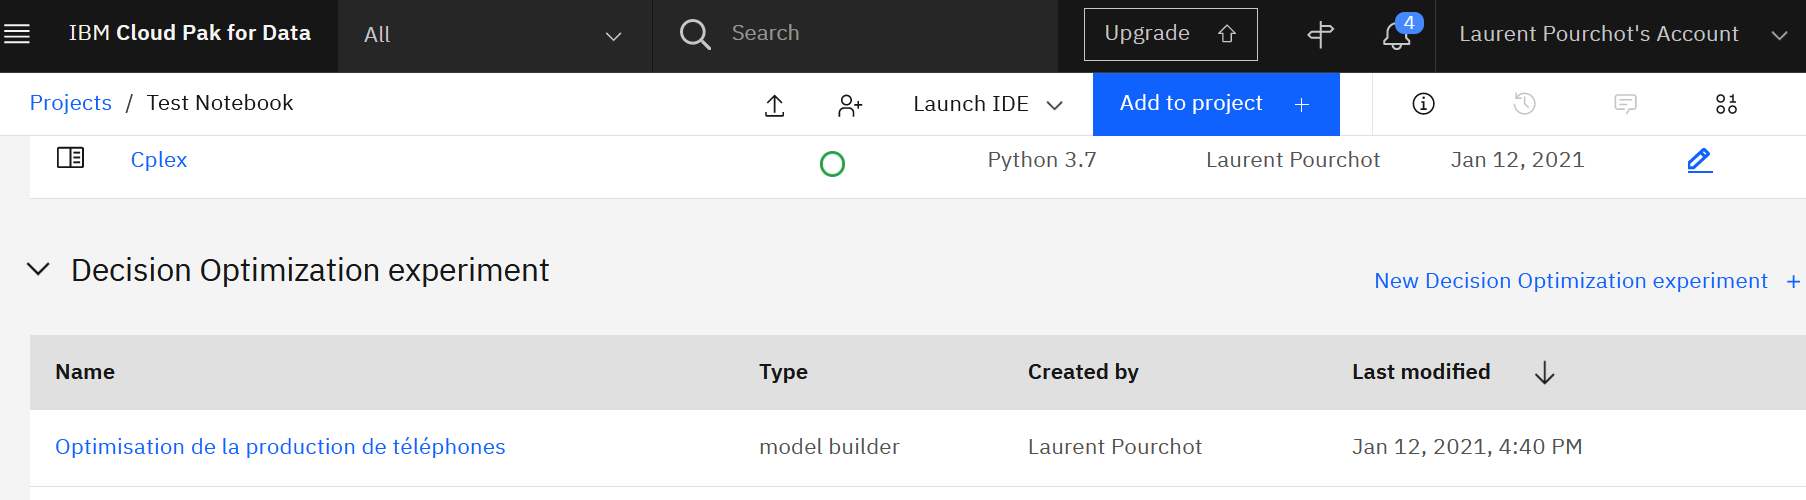

<h2> On importe le notebook en supprimant la partie graphique<h2>

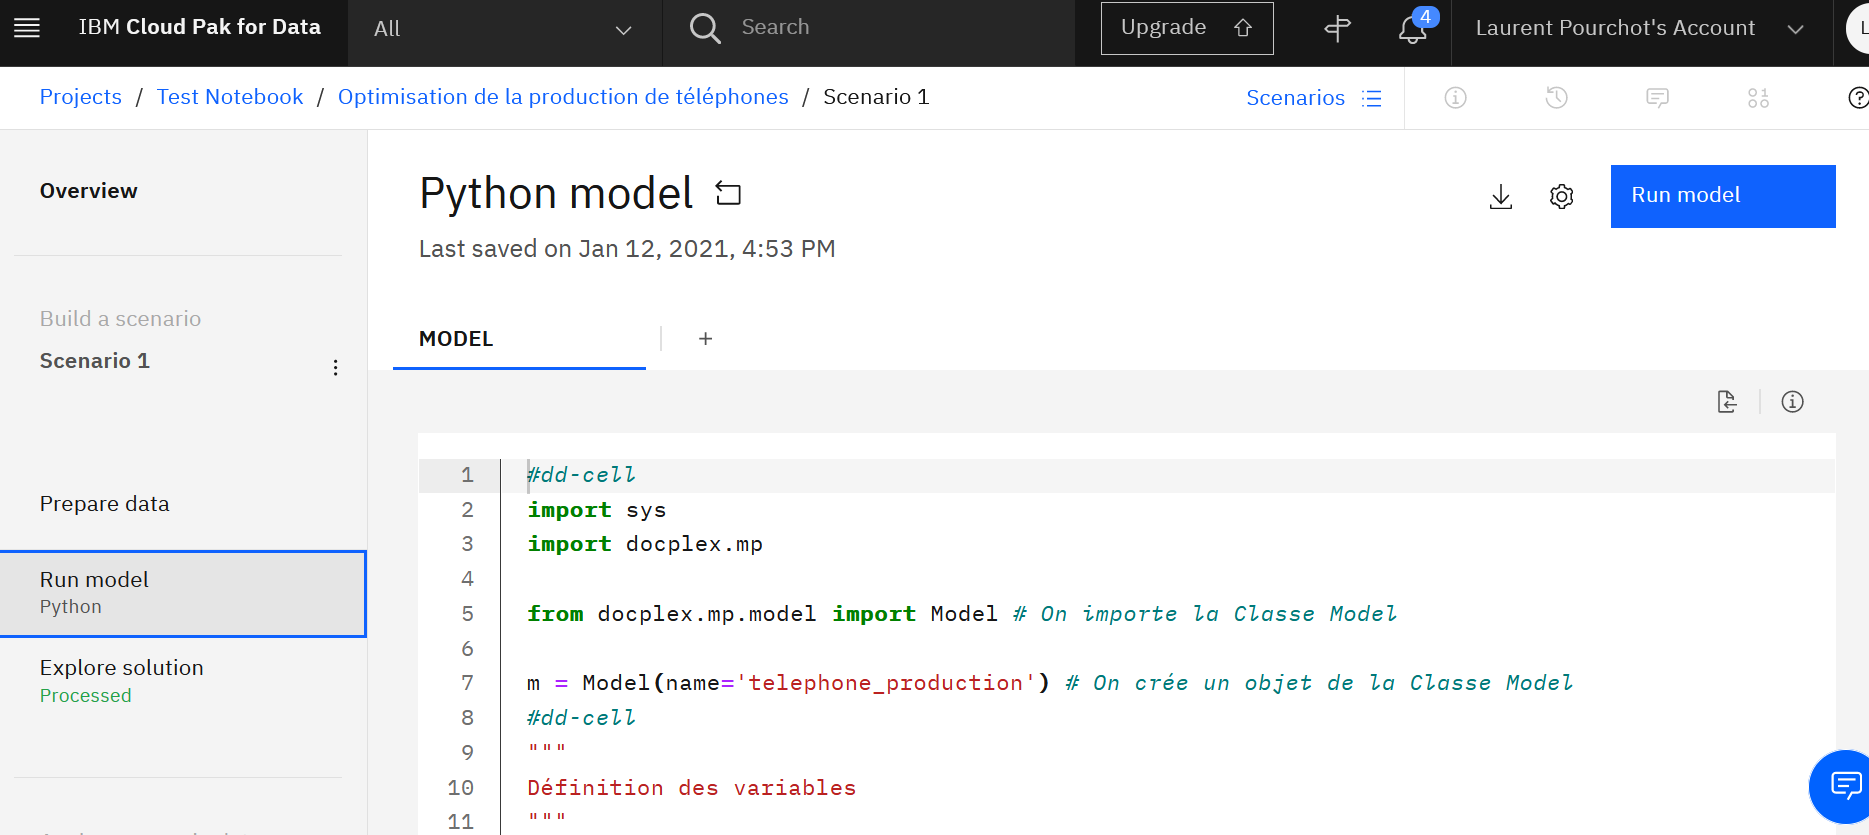

<h2> On lance le run model et on obtient le résultat<h2>

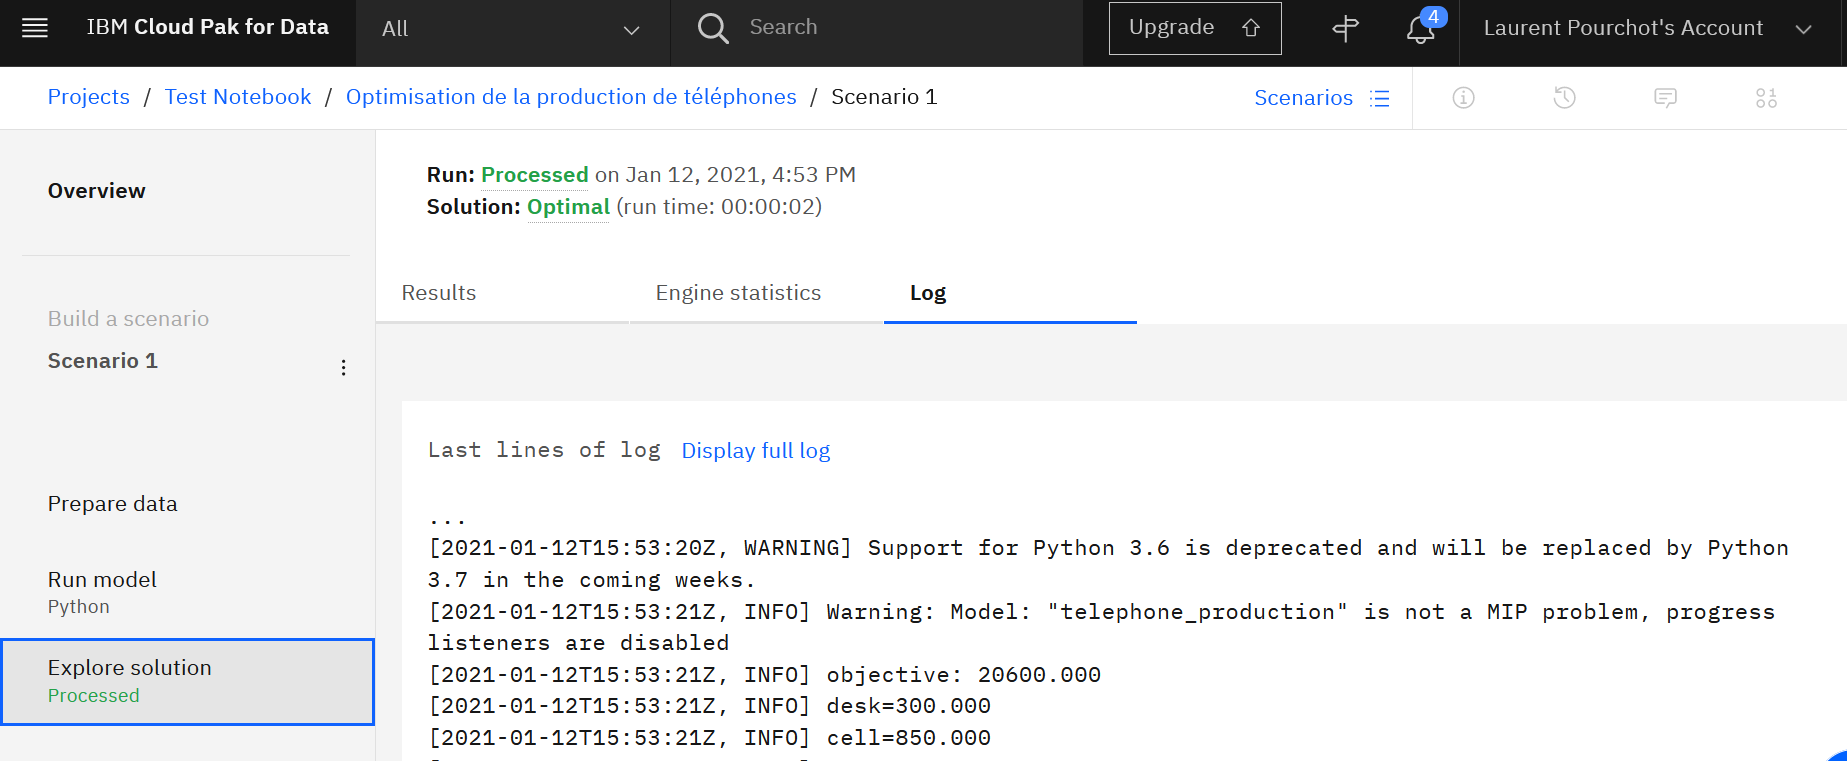


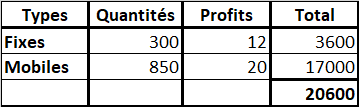